In [1]:
options(repr.plot.width=4, repr.plot.height=4) #Something to modify the size of the plot

# Question 2: What is the probability that the system fails before 70 hours based on your cdf in Question 1?

In [2]:
cdf = function(y){(1-exp(-y/80))^3}

This function is the probability that a certain value falls between $0$ and $y$, where $y=70$ according to the question:

In [3]:
cat(round(cdf(70),4)*100,"%")

19.83 %

Which makes sense given that the means are 80.

# Question 3:Generate a random sample of size 10,000 for the lifetime of System 1

**i) Draw a histogram representing the probability density of the sample. On 
top of the histogram, draw the pdf calculated in Question 1. Does the 
probability density of the sample follow similar pattern as the pdf?**

**ii) Estimate the probability that the system fails before 70 hours using the 
sampled data. Is the result close to the true probability value?**

## i)

In [4]:
n = 10000

A = rexp(n, rate = 1/80)
B = rexp(n, rate = 1/80)
C = rexp(n, rate = 1/80)

#I copy it 3 times with the expectation that the random element will make them different
#Despite the same parameters

Y = cbind(A,B,C)
head(Y)

Y1 = apply(Y,1,max)
head(Y1)

A,B,C
177.90208,37.66048,138.942161
14.05924,268.37468,48.547797
96.34598,462.07320,154.529644
80.70542,23.62402,12.047823
73.69495,46.14321,1.204341
25.77810,48.03577,154.740564


[1] 177.90208 268.37468 462.07320  80.70542  73.69495 154.74056

Now we have the data, we can easily generate  histogram

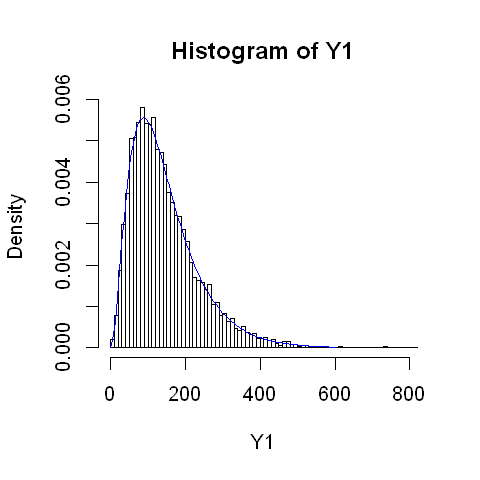

In [5]:
#First, let's get the PDF function up and running
pdf = function(y){(-3/40)*exp(-y/40) + (3/80)*exp(-y/80) + (3/80)*exp(-3*y/80)}

#Now the histogram
hist(Y1, prob=TRUE, breaks = 100)

#Now the curve
curve(pdf, from = 0, to = 600, add=TRUE, col="blue")

And yes, the randomly generated curve does seem to follow the PDF quite closley!

## ii)

In [6]:
cat(round(sum(Y1<70)/n,4)*100,"%")

19.71 %

Which is close enough.